<a href="https://colab.research.google.com/github/JayShekhavat/Case-Study-of-Classification-problem-Logistic-Regression-/blob/main/Case_Study_of_Classification_problem_(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



##Read data by pandas library

In [ ]:
df = pd.read_csv("/content/data_email_campaign.csv")

##Show top 5 records of dataset

In [ ]:
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


##Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


##Shape of dataset

In [ ]:
df.shape

(68353, 12)

There are 68353 rows and 12 columns in the dataset.

##Check duplicates values in the dataset

In [ ]:
df.duplicated().sum()

0

There is no any duplicates values in the dataset.

##Check missing values

In [ ]:
df.isna().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

There are many missing values in the dataset.

##Describe dataset

In [ ]:
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


#Data Cleaning and data preprocessing

##Handle missing  values of the dataset

In [ ]:

df['Total_Past_Communications'] = df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean())
df['Total_Links'] = df['Total_Links'].fillna(df['Total_Links'].mean())
df['Total_Images'] = df['Total_Images'].fillna(df['Total_Images'].mean())

In [ ]:
# filling with most common class
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [ ]:
df.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

In [ ]:
df.shape

(68353, 12)

##Check columns names in the dataset

In [ ]:
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

##Check uniques values of each variables in dataset.

In [ ]:
df.nunique

<bound method DataFrame.nunique of                 Email_ID  Email_Type  Subject_Hotness_Score  \
0      EMA00081000034500           1                    2.2   
1      EMA00081000045360           2                    2.1   
2      EMA00081000066290           2                    0.1   
3      EMA00081000076560           1                    3.0   
4      EMA00081000109720           1                    0.0   
...                  ...         ...                    ...   
68348  EMA00089995974500           2                    0.4   
68349  EMA00089998225300           1                    1.3   
68350  EMA00089998436500           1                    2.2   
68351  EMA00089999168800           1                    0.4   
68352  EMA00089999316900           1                    1.5   

       Email_Source_Type Customer_Location  Email_Campaign_Type  \
0                      2                 E                    2   
1                      1                 G                    2   
2      

In [ ]:
df["Email_Type"].value_counts()

1    48866
2    19487
Name: Email_Type, dtype: int64

In [ ]:
df["Subject_Hotness_Score"].value_counts()

0.3    6889
0.2    6377
0.1    6022
0.0    5410
0.4    2022
1.5    2014
0.5    2009
0.6    1978
1.3    1973
0.7    1957
0.8    1922
1.4    1909
1.2    1905
1.6    1869
1.7    1767
1.0    1744
1.1    1689
0.9    1687
1.8    1671
1.9    1549
2.0    1526
2.1    1390
2.2    1303
2.3    1204
2.4     918
2.5     852
2.6     811
2.7     738
2.8     665
2.9     585
3.0     584
3.1     540
3.2     500
3.3     412
3.4     345
3.5     297
3.6     261
3.7     195
3.8     184
3.9     142
4.0     125
4.1      92
4.2      74
4.3      63
4.4      57
4.5      30
4.6      29
4.7      24
4.8      20
5.0      12
4.9      12
Name: Subject_Hotness_Score, dtype: int64

##Count values of each variables of dataset

In [ ]:
df.value_counts()

Email_ID           Email_Type  Subject_Hotness_Score  Email_Source_Type  Customer_Location  Email_Campaign_Type  Total_Past_Communications  Time_Email_sent_Category  Word_Count  Total_Links  Total_Images  Email_Status
EMA00081000034500  1           2.2                    2                  E                  2                    33.0                       1                         440         8.000000     0.0           0               1
EMA00085070036390  1           0.7                    2                  G                  2                    15.0                       3                         630         4.000000     0.0           0               1
EMA00085069142230  1           0.1                    1                  G                  3                    16.0                       2                         841         9.000000     0.0           0               1
EMA00085069365610  2           1.6                    1                  G                  2                    

In [ ]:
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,G,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
df.shape

(68353, 12)

In [ ]:
df['Customer_Location'].value_counts()

G    34768
E    10193
D     7406
C     5758
F     4433
B     4341
A     1454
Name: Customer_Location, dtype: int64

##Transform categorical values to numerical

In [ ]:
df['Customer_Location'].replace({'A':'1', 'B':'2', 'C':'3', 'D':'4','E':'5','F':'6','G':'7'}, inplace = True)

In [ ]:
df['Customer_Location'].value_counts()

7    34768
5    10193
4     7406
3     5758
6     4433
2     4341
1     1454
Name: Customer_Location, dtype: int64

In [ ]:
df.head(2)

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,1,2.2,2,5,2,33.0,1,440,8.0,0.0,0
1,2,2.1,1,7,2,15.0,2,504,5.0,0.0,0


In [ ]:
df.drop('Email_ID', inplace  = True, axis = 1)

##Find correlation coefficient of each columns in dataset

In [ ]:
df.corr()

<ipython-input-98-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
Email_Type,1.000000,-0.235480,-0.275201,0.233565,-0.044495,-0.000581,0.077938,-0.159864,-0.107505,-0.015074
Subject_Hotness_Score,-0.235480,1.000000,0.006142,-0.550676,-0.419320,-0.003665,-0.237531,-0.027785,-0.020336,-0.146531
Email_Source_Type,-0.275201,0.006142,1.000000,0.035797,-0.066282,0.002137,0.048318,0.056770,0.038621,-0.024527
Email_Campaign_Type,0.233565,-0.550676,0.035797,1.000000,0.341066,0.001388,0.063540,0.004742,-0.008440,0.185510
Total_Past_Communications,-0.044495,-0.419320,-0.066282,0.341066,1.000000,-0.000790,-0.345251,0.106747,0.060909,0.233169
Time_Email_sent_Category,-0.000581,-0.003665,0.002137,0.001388,-0.000790,1.000000,-0.000508,-0.001964,0.000112,0.000051
Word_Count,0.077938,-0.237531,0.048318,0.063540,-0.345251,-0.000508,1.000000,0.072257,0.050712,-0.171116
Total_Links,-0.159864,-0.027785,0.056770,0.004742,0.106747,-0.001964,0.072257,1.000000,0.756984,-0.027857
Total_Images,-0.107505,-0.020336,0.038621,-0.008440,0.060909,0.000112,0.050712,0.756984,1.000000,-0.017370
Email_Status,-0.015074,-0.146531,-0.024527,0.185510,0.233169,0.000051,-0.171116,-0.027857,-0.017370,1.000000


#EDA

## Visualize heatmap

<ipython-input-102-b478558a81ff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


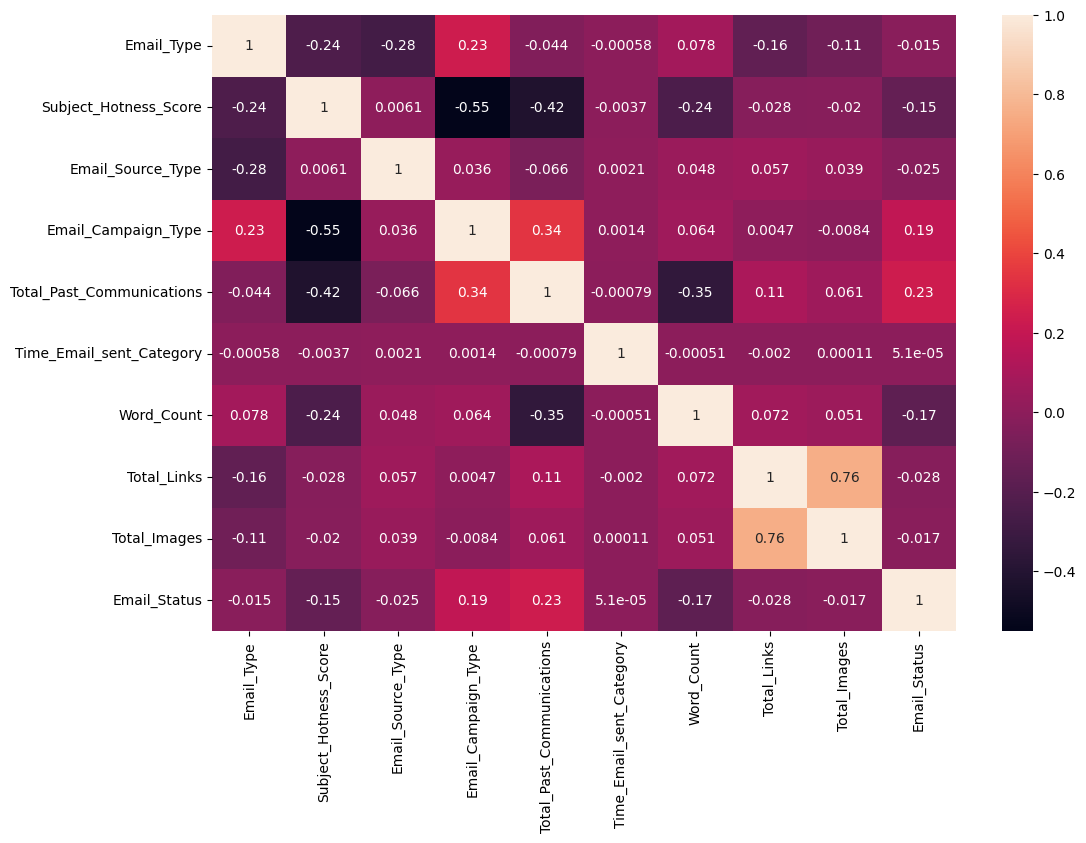

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

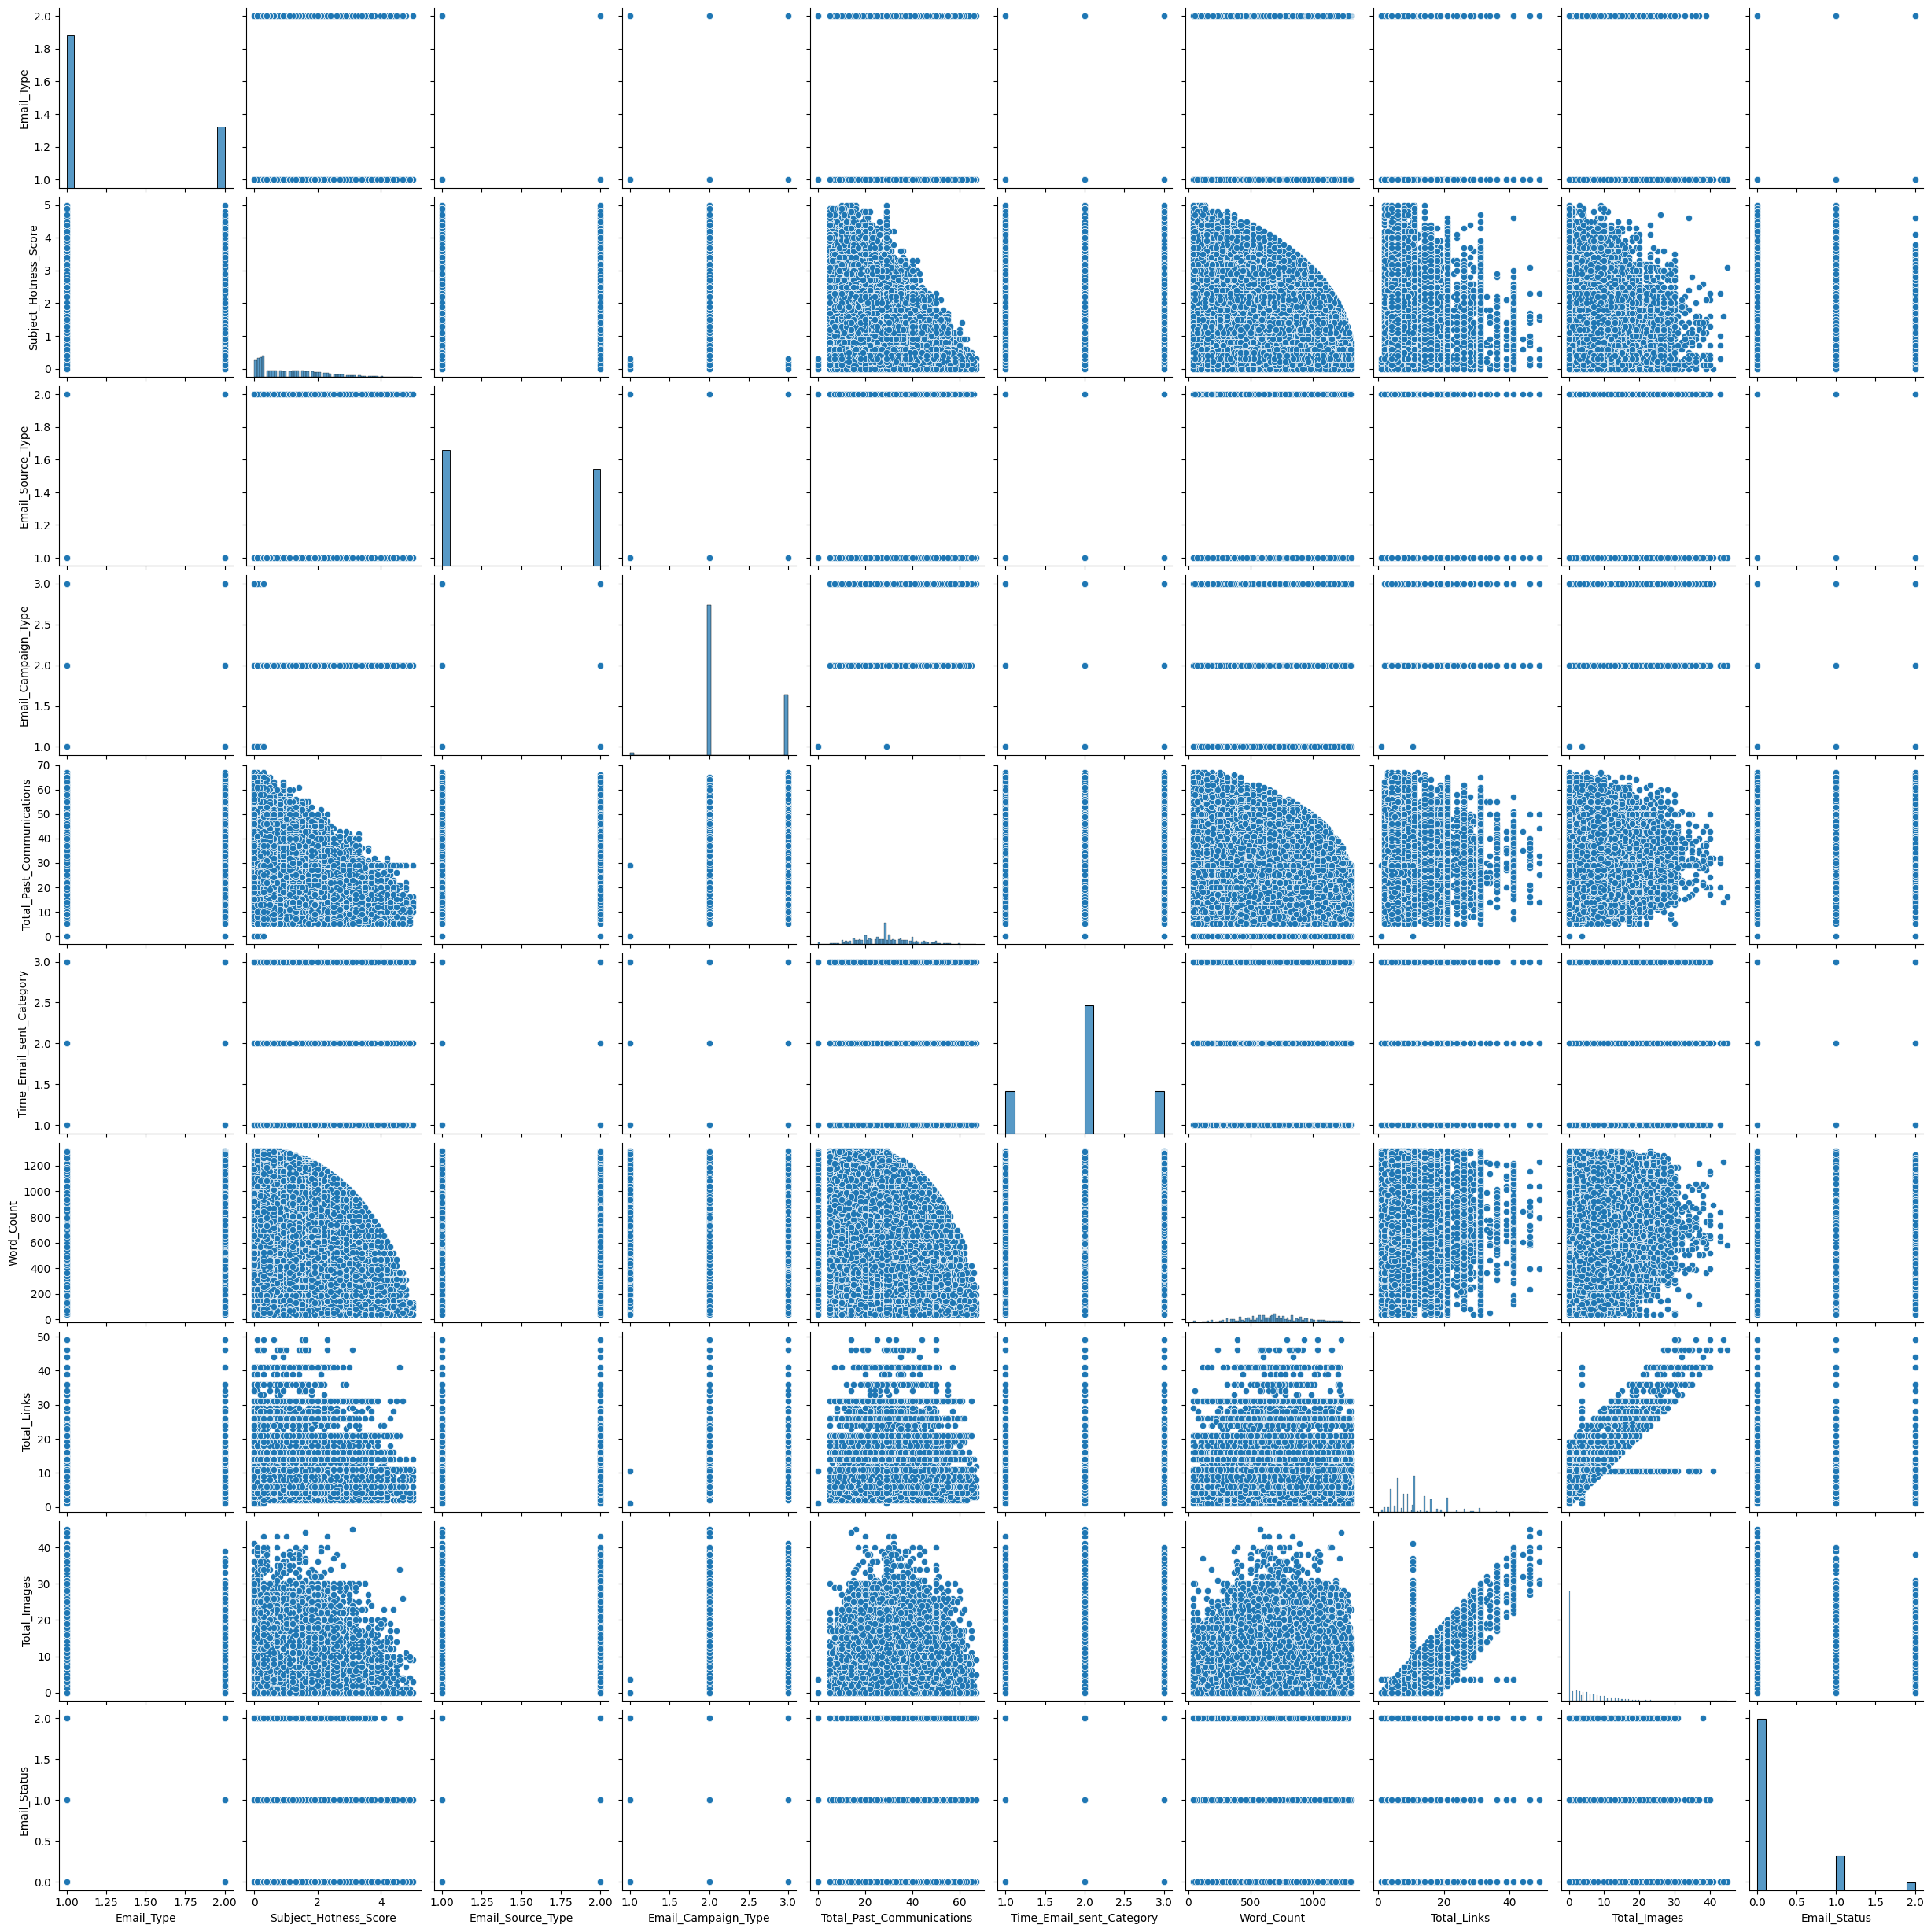

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df.head(1)

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,1,2.2,2,5,2,33.0,1,440,8.0,0.0,0


#Features Selection

##Select dependent variables and independent variable and save into X and Y respectably from dataset.

In [ ]:
Y = df[['Email_Status']]

In [ ]:
X = df[['Total_Past_Communications', 'Total_Links', 'Total_Images', 'Email_Campaign_Type', 'Time_Email_sent_Category', 'Email_Type']]

In [ ]:
X.head()

,Total_Past_Communications,Total_Links,Total_Images,Email_Campaign_Type,Time_Email_sent_Category,Email_Type
0,33.0,8.0,0.0,2,1,1
1,15.0,5.0,0.0,2,2,2
2,36.0,5.0,0.0,3,2,2
3,25.0,16.0,0.0,2,2,1
4,18.0,4.0,0.0,3,2,1


In [ ]:
Y.head()

,Email_Status
0,0
1,0
2,1
3,0
4,0


#Model developing

##Splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 10)

In [ ]:
# Importing the required modules and classes
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Creating an instance of the LogisticRegression class for implementing logistic regression
log_reg = LogisticRegression()

# Performing the logistic regression on train dataset
log_reg.fit(X_train, Y_train)

y_predict  =log_reg.predict(X_test)

accuracy  = accuracy_score(Y_test,y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Accuracy is : ", accuracy)

Accuracy is :  0.8052765044377256


##Conclusion

In this dataset, there are 68353 rows  and 11 columns. There was many missing values in some columns which I removed , and select most correlated columns from the dataset for model development.
I applied Logistic regression algorithm to the dataset and find accuracy which is 0.8052765044377256.